In [29]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from sklearn import linear_model

C(3,4)

In [78]:
def A(k, b):
    a = np.zeros((b,b), dtype=int)
    for i in np.arange(1,b+1):
        for j in np.arange(1,b+1):
            a[i-1,j-1] = bool(i & j)

    a_d={}
    a_d[2] = a
    for i in np.arange(3, k+1):
        a_d[i] = (a_d[i-1]) @ (a)
        
    return a_d[k]


def B(k, b):
    a = np.zeros((b,b), dtype=int)
    for i in np.arange(1,b+1):
        for j in np.arange(1,b+1):
            if not (i==j):
                a[i-1,j-1] = bool(i & j)

    a_d={}
    a_d[2] = a
    for i in np.arange(3, k+1):
        a_d[i] = (a_d[i-1]) @ (a)
        
    return a_d[k]


def euler_774(n, b):
    A = np.zeros((b,b), dtype=int)
    for i in np.arange(1,b+1):
        for j in np.arange(1,b+1):
            A[i-1,j-1] = bool(i & j)

    A_d={}
    A_d[2] = A
    for i in np.arange(3, n+1):
        print(".", end="")
        A_d[i] = (A_d[i-1] % 998244353) @ (A % 998244353)

    return np.sum(A_d[n]) % 998244353

## Examples

In [83]:
b=9
z = pd.DataFrame(A(2, b), index=np.arange(1,b+1), columns=np.arange(1,b+1))
z.style.highlight_max(color="green")

,1,2,3,4,5,6,7,8,9
1,1,0,1,0,1,0,1,0,1
2,0,1,1,0,0,1,1,0,0
3,1,1,1,0,1,1,1,0,1
4,0,0,0,1,1,1,1,0,0
5,1,0,1,1,1,1,1,0,1
6,0,1,1,1,1,1,1,0,0
7,1,1,1,1,1,1,1,0,1
8,0,0,0,0,0,0,0,1,1
9,1,0,1,0,1,0,1,1,1


In [4]:
euler_774(10, 6)

........

2496120

In [82]:
A(2, 10)

array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 1, 1, 1]])

In [ ]:
un chemin de longueur n dans le graphe de b
si on enleve un sommet, c'un un graphe de long n-1

## Linear Model

In [30]:
b=7
kmax=20
zzz=pd.DataFrame(np.array([[k, np.sum(A(k, b))] for k in np.arange(2,kmax)], dtype="float"), columns=["k", "c"])
zzz["log_c"] = np.log(zzz["c"])

reg = linear_model.LinearRegression()
model = reg.fit(zzz["k"].values.reshape(zzz.shape[0],1), zzz["log_c"])

zzz["res"] = zzz["log_c"] - model.coef_[0]*zzz["k"] - model.intercept_
zzz

,k,c,log_c,res
0,2.0,3.700000e+01,3.610918,-0.003782
1,3.0,2.050000e+02,5.323010,0.001418
2,4.0,1.129000e+03,7.029088,0.000604
3,5.0,6.223000e+03,8.736007,0.000633
4,6.0,3.429700e+04,10.442813,0.000547
5,7.0,1.890250e+05,12.149635,0.000477
6,8.0,1.041793e+06,13.856454,0.000404
7,9.0,5.741743e+06,15.563273,0.000333
8,10.0,3.164507e+07,17.270093,0.000261
9,11.0,1.744088e+08,18.976912,0.000189


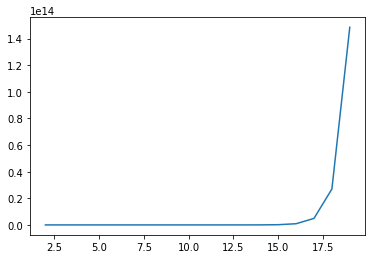

In [27]:
plt.plot(zzz["k"], zzz["c"])
plt.show()

In [ ]:
A = np.eye(2) * 2
B = np.eye(3) * 3
np.block([
    [A,               np.zeros((2, 3))],
    [np.ones((3, 2)), B               ]
])

In [76]:
b=7
kmax=22
zzz=pd.DataFrame(np.array([[k, np.sum(A(b,k))] for k in np.arange(2,kmax)], dtype="float"), columns=["k", "c"])

zzz["log_c"] = np.log(zzz["c"])
nb_k = zzz.shape[0]

In [72]:
## log_c_fit = a k + b
## log_c = a k + b + res
## c = exp(res) * exp(a k * b)
## c - c_fit = c_fit * ( exp(res) - 1 )

reg = linear_model.LinearRegression()
model = reg.fit(zzz["k"].values.reshape(nb_k,1), zzz["log_c"])

zzz["log_c_fit"] = model.coef_[0]*zzz["k"] + model.intercept_
zzz["log_c_fit_res"] = zzz["log_c"] - zzz["log_c_fit"]
zzz["c_fit"] = np.exp(zzz["log_c_fit"])
zzz["c_fit_res"] = zzz["c"] - zzz["c_fit"]


In [73]:
zzz

,k,c,log_c,log_c_fit,log_c_fit_res,c_fit,c_fit_res
0,2.0,3.000000e+01,3.401197,3.413375,-0.012178,3.036756e+01,-3.675604e-01
1,3.0,1.380000e+02,4.927254,4.920135,0.007119,1.370211e+02,9.789326e-01
2,4.0,6.180000e+02,6.426488,6.426894,-0.000406,6.182509e+02,-2.509445e-01
3,5.0,2.796000e+03,7.935945,7.933654,0.002291,2.789602e+03,6.398096e+00
4,6.0,1.260000e+04,9.441452,9.440414,0.001038,1.258693e+04,1.307417e+01
5,7.0,5.686800e+04,10.948488,10.947174,0.001314,5.679330e+04,7.469854e+01
6,8.0,2.565120e+05,12.454931,12.453933,0.000997,2.562563e+05,2.556962e+02
7,9.0,1.157304e+06,13.961604,13.960693,0.000911,1.156251e+06,1.053323e+03
8,10.0,5.220936e+06,15.468187,15.467453,0.000734,5.217103e+06,3.832623e+03
9,11.0,2.355398e+07,16.974806,16.974213,0.000593,2.354002e+07,1.396090e+04


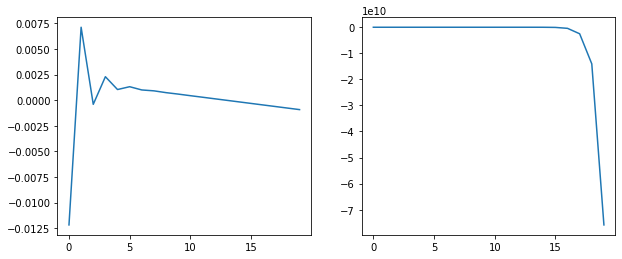

In [75]:
plt.figure(figsize=(10,4))


plt.subplot(1,2,1)
#plt.plot(zzz["log_c"])
#plt.plot(zzz["log_c_fit"])
plt.plot(zzz["log_c_fit_res"])

plt.subplot(1,2,2)
#plt.plot(zzz["c"])
#plt.plot(zzz["c_fit"])
plt.plot(zzz["c_fit_res"])


plt.show()

In [ ]:
A = np.eye(2) * 2
B = np.eye(3) * 3

np.block([
    [A,               np.zeros((2, 3))],
    [np.ones((3, 2)), B               ]
])

